# 신용 대출 분석 인공지능
- 신청자의 정보를 파악하고 대출 여부를 판단하는 인공지능 프로그램

In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## Load Data
- loanData는 19개의 칼럼으로 되어 있으며, 첫 번째 칼럼부터 18번째 칼럼까지는 대출 신청을 위한 사용자 정보가 저장되어 있으며 19번째 칼럼에는 대출 승인 여부가 이진(binary) 형태로 저장되어 있다.
### 컬럼 설명
1. id: 고객 아이디
2. gender: 대출 신청자 성별
3. age: 대출 신청자 나이
4. married: 결혼 유무
5. dependents: 가족 수
6. education: 학력
7. self_employed: 자영업 유무
8. business_type: 국세청 기준 대출 신청인 업종 코드
9. applicant_income: 대출 신청인 수입
10. applicant_work_period: 대출 신청인 근무 기간
11. coapplicant_income: 배우자 수입
12. credit_history: 금융서비스(대출) 이용 횟수
13. credit_amount: 대출중인 금액
14. property_area: 주거지 종류(Urban: 도시, Semiurban: 준도시, Rural: 시골)
15. property_type: 주거지 소유 여부(1: 자가, 2: 월세, 3: 전세, 4: 기타)
16. credit_rate: 신용등급
17. loan_amount: 대출 금액
18. loan_term: 대출 상환 기간
19. loan_status: 대출 승인 여부

In [3]:
loan_data = pd.read_csv('loanData.csv')

In [4]:
loan_data.head()

,id,gender,age,married,dependents,education,self_employed,business_type,applicant_income,applicant_work_period,coapplicant_income,credit_history,credit_amount,property_area,property_type,credit_rate,loan_amount,loan_term,loan_status
0,LA001250,Male,55,Yes,3+,Not Graduate,No,88,4755,51,0.0,0.0,0,Semiurban,3,8,2090,0,0
1,LA001864,Male,68,Yes,3+,Not Graduate,No,14,4931,47,0.0,NaN,0,Semiurban,3,7,5376,24,0
2,LA002536,Male,43,Yes,3+,Not Graduate,No,56,3095,33,0.0,1.0,1382,Rural,3,5,3390,33,1
3,LA001264,Male,22,Yes,3+,Not Graduate,Yes,46,3333,68,2166.0,NaN,0,Semiurban,2,5,2600,36,1
4,LA001384,Male,34,Yes,3+,Not Graduate,No,60,2071,60,754.0,1.0,2756,Semiurban,2,5,2820,53,0


- unique()를 통해 특정 칼럼 중 중복을 제외한 값을 출력
- 칼럼의 고윳값을 확인할 수 있다

In [5]:
loan_data['gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [6]:
loan_data['married'].unique()

array(['Yes', 'No', nan], dtype=object)

In [7]:
loan_data['dependents'].unique()

array(['3+', '2', '1', '0', nan], dtype=object)

In [8]:
loan_data['education'].unique()

array(['Not Graduate', 'Graduate'], dtype=object)

In [9]:
loan_data['self_employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [10]:
loan_data['business_type'].unique()

array([88, 14, 56, 46, 60, 80, 21, 66, 30, 64, 42, 94,  4, 45, 26, 76, 74,
       35, 43, 59, 11, 29, 61, 78, 51, 81, 58, 10, 37, 16, 49, 55, 96, 36,
       83, 68, 70, 63, 13, 65, 86, 85, 40, 73, 41, 31, 24, 93, 27, 15, 97,
       82, 47,  3, 87, 53, 91, 48, 71, 84, 89, 33, 67, 57, 52, 90,  5,  1,
        2, 28, 77, 79, 92, 72, 99, 17, 44, 69, 95, 38, 20, 54, 34,  9,  8,
       50, 18,  6, 19, 62, 23, 32, 75, 98, 12, 22, 25,  7], dtype=int64)

In [11]:
loan_data['credit_history'].unique()

array([ 0., nan,  1.])

In [12]:
loan_data['property_area'].unique()

array(['Semiurban', 'Rural', 'Urban'], dtype=object)

## Mark Data & normalize
- 컬럼값을 실수형 데이터로 변환하기
- *_mapping: * 칼럼에 있는 데이터를 특정 값으로 변형하기 위한 매개변수

In [13]:
loan_data['gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [14]:
gendr_mapping = {'Male': 1, 'Female': 0, np.nan: -1}

In [15]:
loan_data['married'].unique()

array(['Yes', 'No', nan], dtype=object)

In [16]:
married_mapping = {'No': 0, 'Yes': 1, np.nan: -1}

In [17]:
loan_data['dependents'].unique()

array(['3+', '2', '1', '0', nan], dtype=object)

In [18]:
dep_mapping = {'0': 0, '1': 1, '2': 2, '3+': 3, np.nan: -1}

In [19]:
loan_data['education'].unique()

array(['Not Graduate', 'Graduate'], dtype=object)

In [20]:
edu_mappiong = {'Graduate': 1, 'Not Graduate': 0}

In [21]:
loan_data['self_employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [22]:
emp_mapping = {'No': 0, 'Yes': 1, np.nan: -1}

In [23]:
loan_data['property_area'].unique()

array(['Semiurban', 'Rural', 'Urban'], dtype=object)

In [24]:
prop_mapping = {'Urban': 1, 'Rural': 3, 'Semiurban': 2}

In [25]:
loan_data = loan_data.replace({'gender': gendr_mapping,
                               'married': married_mapping,
                               'dependents': dep_mapping,
                               'education': edu_mappiong,
                               'self_employed': emp_mapping,
                               'property_area': prop_mapping
                              })

In [26]:
loan_data.head()

,id,gender,age,married,dependents,education,self_employed,business_type,applicant_income,applicant_work_period,coapplicant_income,credit_history,credit_amount,property_area,property_type,credit_rate,loan_amount,loan_term,loan_status
0,LA001250,1,55,1,3,0,0,88,4755,51,0.0,0.0,0,2,3,8,2090,0,0
1,LA001864,1,68,1,3,0,0,14,4931,47,0.0,NaN,0,2,3,7,5376,24,0
2,LA002536,1,43,1,3,0,0,56,3095,33,0.0,1.0,1382,3,3,5,3390,33,1
3,LA001264,1,22,1,3,0,1,46,3333,68,2166.0,NaN,0,2,2,5,2600,36,1
4,LA001384,1,34,1,3,0,0,60,2071,60,754.0,1.0,2756,2,2,5,2820,53,0


# Train Test Split

In [27]:
# id 제외
X = loan_data.loc[:, 'gender':'loan_term']

In [28]:
y = loan_data.loc[:, 'loan_status']

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Train Model

In [30]:
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier()

In [31]:
from sklearn.metrics import accuracy_score

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

In [32]:
calculate_accuracy(model, x_test, y_test)

Accuracy: 84.55%


0.8455284552845529

# Improving Models

In [33]:
model = XGBClassifier(
    booster='gbtree',
    objective='binary:logistic',
    learning_rate=0.04,
    n_estimators=50,
    reg_alpha =0.45,
    reg_lambda=0.6
)
model.fit(x_train, y_train)

print(model.evals_result)
calculate_accuracy(model, x_test, y_test)

<bound method XGBClassifier.evals_result of XGBClassifier(learning_rate=0.04, n_estimators=50, reg_alpha=0.45,
              reg_lambda=0.6)>
Accuracy: 85.37%


0.8536585365853658

- 수치만으로는 모델이 어떻게 학습됐지는지, 이 모델이 어떤 데이터에 취약한지, 어떤 경우에 대출 심사가 빨리 끝날지 알 수 없다

## show XAI
### 피처 중요도
- 신용 대출 판별 모델의 피처 중요도 출력

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

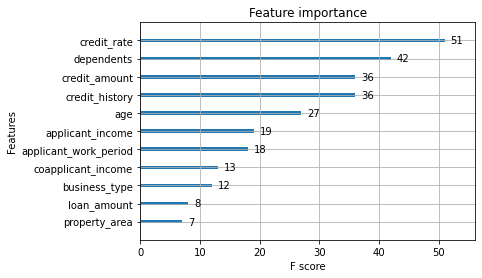

In [34]:
import xgboost
xgboost.plot_importance(model)

- 피처 중요도 그래프에 의해, credit_rate, dependents, credit_amount, credit_history, age... 순으로 중요한 것을 알 수 있다
- 피처 중요도는 음의 영향력을 표시하지 않는다, 대출 신청자의 수입이 많으면 대출에 유리? 불리?
- 나이는 적을수록 유리? 불리? (ex. 나이가 어리면 일할 수 있는 날이 많아서 대출을 갚는 데 유리 vs 나이가 많으면 주변에 경제활동 하는 사람들이 많아서 대리상환 가능
$\rightarrow$ 피처 중요도 그래프로 대답할 수 없음

### SHAP
- 각 피처의 스케일별 영향력 계산
- outlier에 약하고 샘플 계산이 오래걸리지만 피처별로 스케일이 변함에 따라 모델에 어떤 영향을 미치는지 파악 가능

In [35]:
import shap

In [36]:
x_train.iloc[1, :]

gender                       1.0
age                         39.0
married                      1.0
dependents                   2.0
education                    1.0
self_employed                0.0
business_type               91.0
applicant_income         16666.0
applicant_work_period       39.0
coapplicant_income           0.0
credit_history               1.0
credit_amount             3571.0
property_area                1.0
property_type                1.0
credit_rate                  4.0
loan_amount              11550.0
loan_term                   30.0
Name: 105, dtype: float64

In [37]:
idx = 13

# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])

- 13번째의 사용자의 섀플리 요인 분석 결과 $\rightarrow$ 승인
- 그래프에 의하면 신용 등급과 금융서비스(대출) 이용 횟수 덕분에 대출이 승인됐다고 할 수 있다 (파랑색은 감점 요인)

In [38]:
idx = 15

# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])

- 15번째의 사용자의 섀플리 요인 분석 결과 $\rightarrow$ 거절
- 그래프에 의하면 금융서비스(대출) 이용 횟수와 나이 때문에 대출이 거절됐다고 할 수 있다

In [39]:
# 전체 설명체에 대한 섀플리 값
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, x_train)

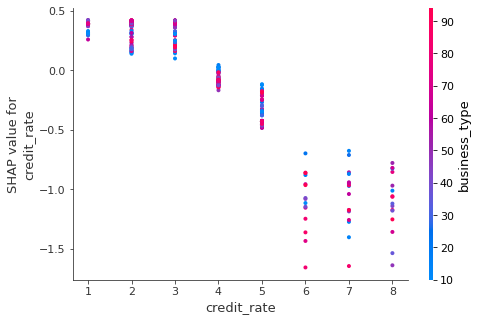

In [40]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("credit_rate", shap_values, x_train)

- 신용 등급과 대출 여부와의 관계를 플롯한 결과, SHAP 분석 도구는 5등급부터 대출에 부정적인 영향을 미친다고 말한다
- 대출 여부가 신용 등급과 느슨한 선형 관계를 갖는다는 것을 보여준다

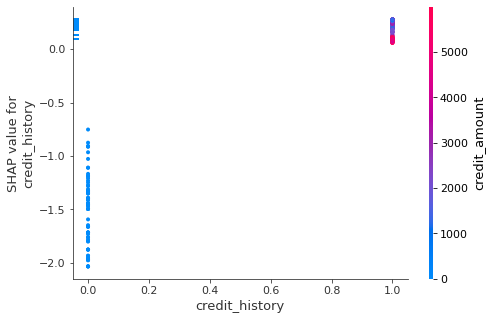

In [41]:
shap.dependence_plot("credit_history", shap_values, x_train)

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


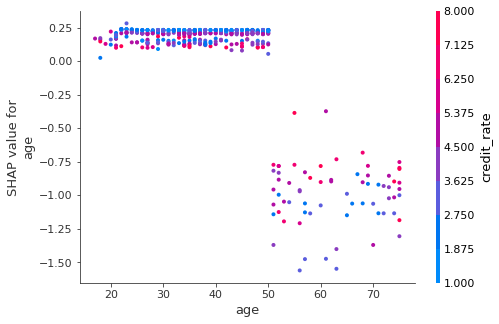

In [42]:
shap.dependence_plot("age", shap_values, x_train)

- 위 그래프는 연령대별 대출 여부를 그래프로 나타낸 결과
- 20대 초반 혹은 50대 이상이라면 대출에 부정적인 영향
- 그렇지 않으면 대출 승인에 긍정적인 영향을 미친다

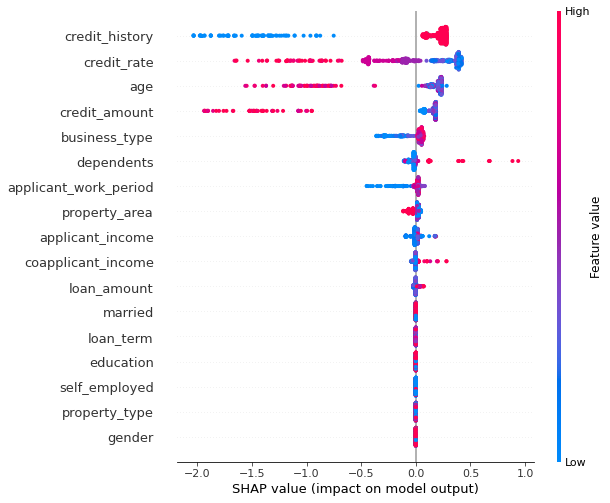

In [43]:
# 대출 승인 여부에 영향을 미치는 요소를 모두 출력한 결과
# summarize the effects of all the features
shap.summary_plot(shap_values, x_train)

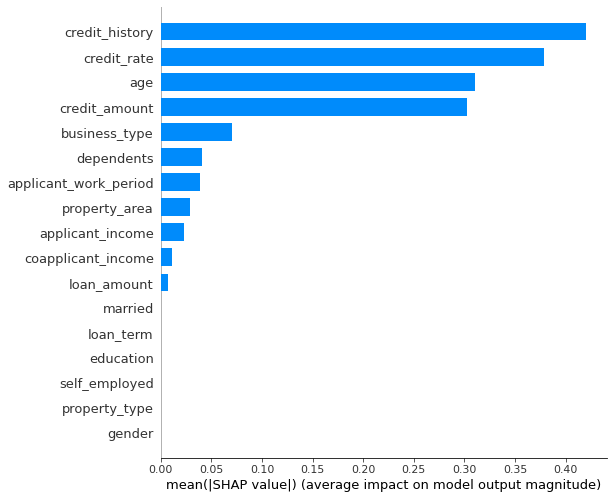

In [44]:
# SHAP의 섀프리 값 영향도를 평균 내어 총괄 플롯을 출력한 결과
shap.summary_plot(shap_values, x_train, plot_type="bar")

# plot Tree
- os.environ["PATH"] += os.pathsep + [각자 경로 입력]
- ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tpng'], make sure the Graphviz executables are on your systems' PATH 에러가 난다면 https://graphviz.org/download/ 에서 다운로드 후 실행한 다음 경로를 찾아서 위 코드에 입력

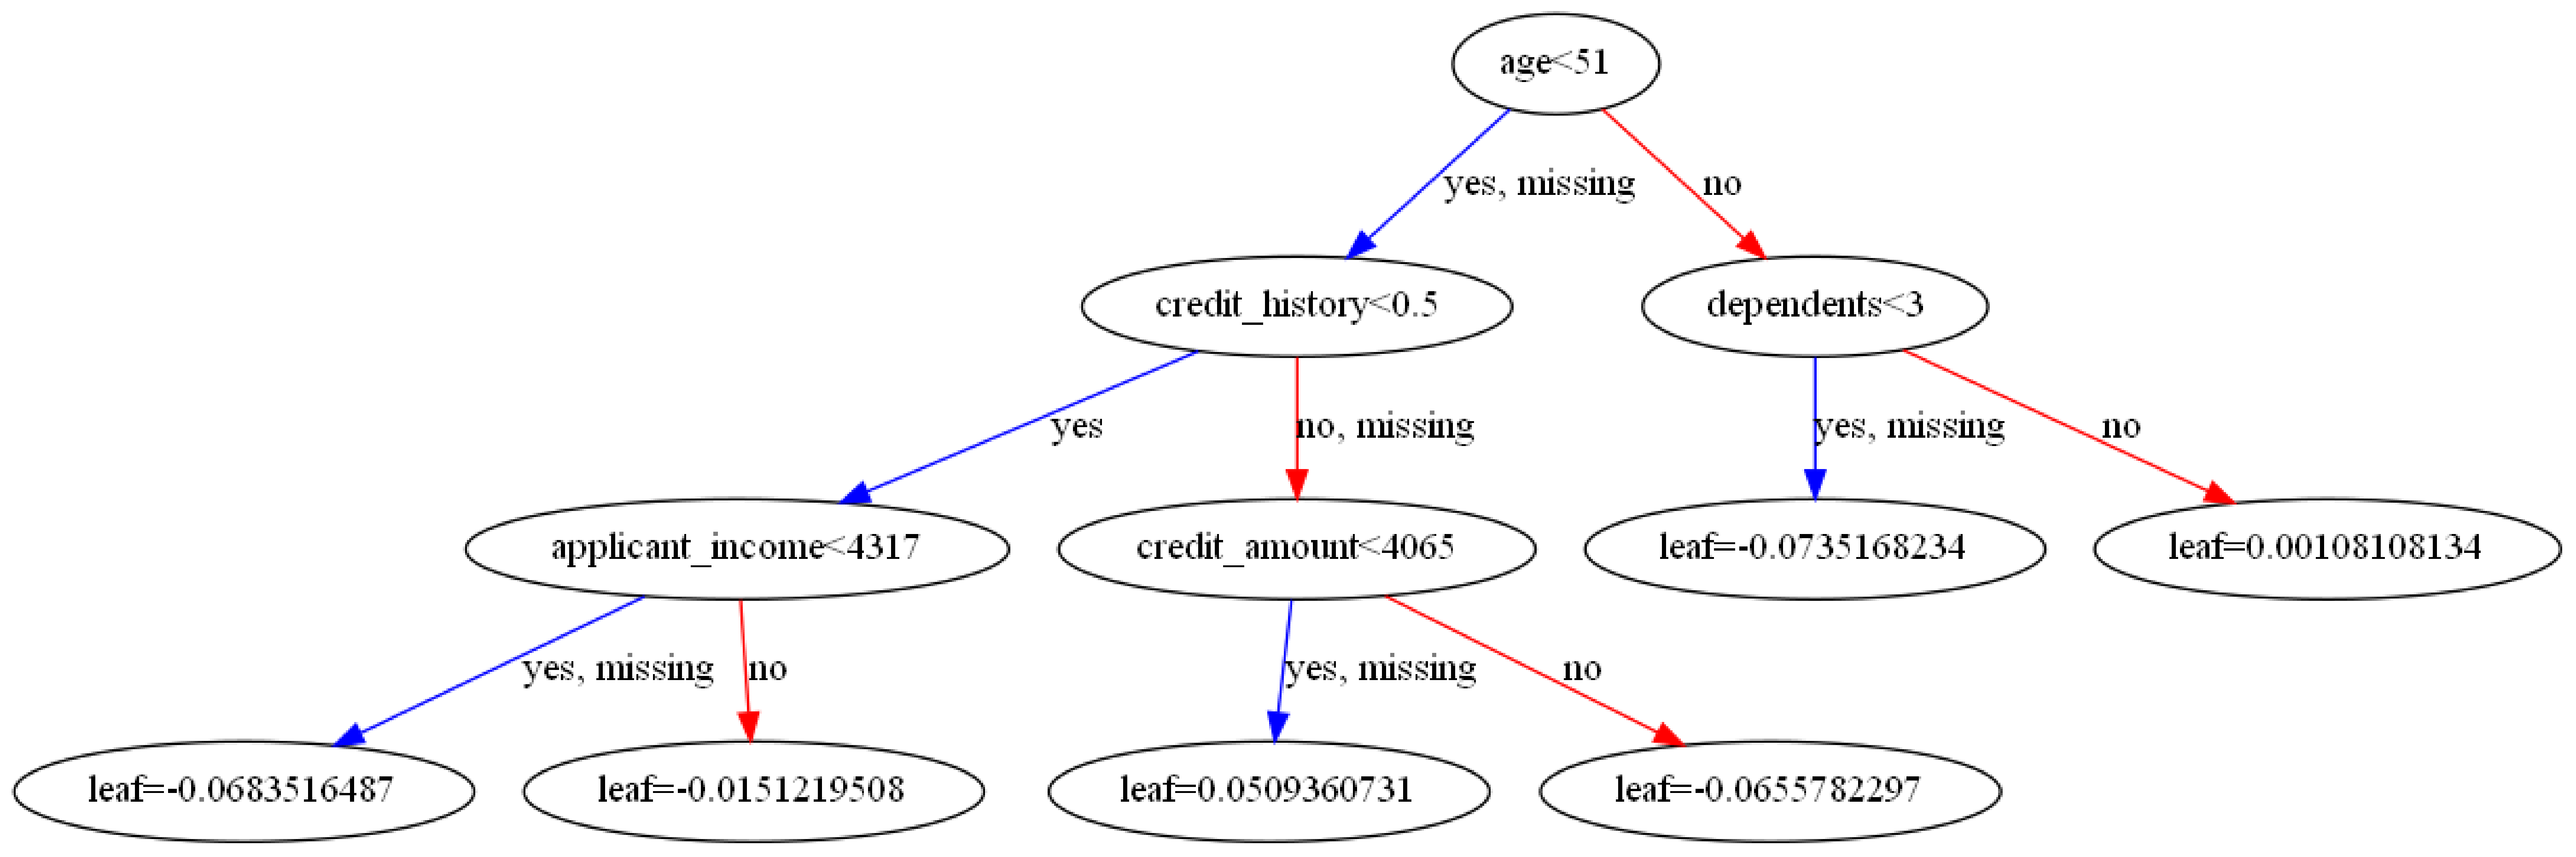

In [45]:
%matplotlib inline
import os

# os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

import matplotlib.pyplot as plt

from xgboost import plot_tree
from matplotlib.pylab import rcParams

##set up the parameters
rcParams['figure.figsize'] = 100,200

plot_tree(model)
plt.show()

# Leaf value

https://stackoverflow.com/questions/40926340/what-does-the-value-of-leaf-in-the-following-xgboost-model-tree-diagram-means

For a classification tree with 2 classes {0,1}, the value of the leaf node represent the raw score for class 1. It can be converted to a probability score by using the logistic function. The calculation below use the left most leaf as an example.

1/(1+np.exp(-1*0.167528))=0.5417843204057448
What this means is if a data point ends up being distributed to this leaf, the probability of this data point being class 1 is 0.5417843204057448.

In [46]:
def print_prob(leaf_value):
    result = 1/(1+np.exp(-1*leaf_value))
    print('{:.2%}'.format(result))
    return result

In [47]:
print_prob(-0.064385)

48.39%


0.48390930818332867

## XAI로 모델 개선 근거 마련하기
- 대출 심사 데이터에서 학력 피처를 삭제하고 모델을 학습시키는 코드
- 피처를 삭제하거나 추가해도 성능에 변화가 없다면 피처를 삭제하는 것이 왜 중요할까? $\rightarrow$ 한정된 개수의 피처를 측정하고 효율적으로 스크리닝해야한다. 따라서 비효율적인 피처를 찾고 삭제하는 일은 중요하다 또한 필요 없는 피처를 삭제하면 삭제한 피처 개수만큼 새로운 지표를 발굴할 수 있다

In [48]:
loan_data = loan_data.drop(columns='education')

# id 제외
X = loan_data.loc[:, 'gender':'loan_term']
y = loan_data.loc[:, 'loan_status']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

model = XGBClassifier(
    booster='gbtree',
    objective='binary:logistic',
    learning_rate=0.02,
    n_estimators=300,
    reg_alpha =0.7,
    reg_lambda=0.5,
    max_depth=4
)
model.fit(x_train, y_train)
calculate_accuracy(model, x_test, y_test)

Accuracy: 86.18%


0.8617886178861789